# Fraud Detection with **_Kernel Density Estimation_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
transactions = pd.read_csv('anonymized.csv')

In [3]:
transactions.Date = pd.to_datetime(transactions.Date, format='%d%b%Y')

monthly_transactions = transactions.groupby(pd.Grouper(key='Date', freq='M')).sum()

In [4]:
x = monthly_transactions.Amount.values.reshape(-1, 1)
x_plot = np.linspace(x.min(), x.max(), num=150)
kde = KernelDensity(kernel='gaussian', bandwidth=x.std() / 2)
kde.fit(x)
y_plot = np.exp(kde.score_samples(x_plot.reshape(-1, 1)))

In [5]:
n_samples = 10
x_samp = kde.sample(n_samples)

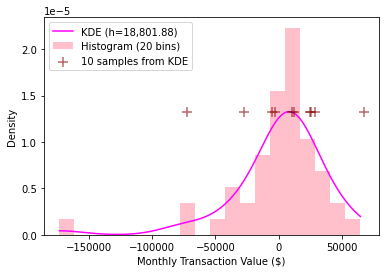

In [6]:
plt.plot(x_plot, y_plot, color='magenta', label='KDE (h={:,.2f})'.format(kde.bandwidth))
plt.hist(monthly_transactions.Amount, density=True, color='pink', bins=20, label='Histogram (20 bins)')
plt.scatter(x_samp, np.repeat(y_plot.max(), n_samples),
            zorder=3, color='darkred', marker='+', alpha=0.6, s=100, label=f'{n_samples} samples from KDE')
plt.legend()
plt.xlabel('Monthly Transaction Value ($)')
plt.ylabel('Density')
plt.show()